# Manipulate the scraped data

## Loading part

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import requests
import shutil

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from IPython.display import display, HTML
display(HTML("<style>.container { width:78% !important; }</style>"))

In [2]:
# Load scraped data
df = pd.read_csv('baklava_scrape.csv')
df.head()

,baklava_name,baklava_size,baklava_price,baklava_image_url
0,Pistachio-Walnut Baklava Assortment,XL Metal Box),"\n€51,71\n",https://online.hafizmustafa.com/Uploads/UrunRe...
1,Premium Baklava Assortment,L Metal Box ),"\n€45,96\n",https://online.hafizmustafa.com/Uploads/UrunRe...
2,Pistachio-Walnut Baklava Assortment,L Metal Box),"\n€42,52\n",https://online.hafizmustafa.com/Uploads/UrunRe...
3,Pistachio Baklava Assortment,XL Metal Box),"\n€57,45\n",https://online.hafizmustafa.com/Uploads/UrunRe...
4,Pistachio-Walnut Baklava Assortment,S Metal Box),"\n€21,83\n",https://online.hafizmustafa.com/Uploads/UrunRe...


## Convert from url to jpg image on the repository

In [3]:
# Convert from url to jpg image on computer
for url in df['baklava_image_url']:
    img_data = requests.get(url).content
    image_name = url.split("thumb/")[1]
    with open(image_name, 'wb') as handler:
        handler.write(img_data)
        current_dir = image_name
        #move_to = f'/Users/oguzhangul/Desktop/image_folder/{image_name}'
        move_to = f'./imagefolder/{image_name}'
        shutil.move(current_dir,move_to)
    

## Add another feature containing the path to images on repository

In [4]:
# Add all path for the image on the repository
base = 'imagefolder/'
baklava_path = []
for url_jpg in df['baklava_image_url']:
    baklava_path.append(base + url_jpg.split('thumb/')[1])

df['baklava_image_path'] = baklava_path

In [5]:
# See the new dataframe
df.head(2)

,baklava_name,baklava_size,baklava_price,baklava_image_url,baklava_image_path
0,Pistachio-Walnut Baklava Assortment,XL Metal Box),"\n€51,71\n",https://online.hafizmustafa.com/Uploads/UrunRe...,imagefolder/fistikli-cevizli-karisik-baklava-x...
1,Premium Baklava Assortment,L Metal Box ),"\n€45,96\n",https://online.hafizmustafa.com/Uploads/UrunRe...,imagefolder/premium-karisik-baklava-l-kutu-478...


## Cleaning and adding relevant features

### Adding premium feature

In [6]:
# Checkpoint for not restarting entire notebook
df_clean = df.copy()

# Some of the baklava are Premium. Those can have their own feature called premium 
indexes_premium = df_clean[df_clean['baklava_name'].str.contains('Premium')].index
indexes_not_premium = df_clean[~df_clean['baklava_name'].str.contains('Premium')].index

#Adding the new feauture with Premium/ Not Premium
df_clean.loc[indexes_premium,'premium'] = 'Premium'
df_clean.loc[indexes_not_premium,'premium'] = 'Not Premium'

#Deleting all the places where Premium appears in name
df_clean["baklava_name"] = df_clean["baklava_name"].str.replace("Premium ", "")

### Cleaning baklava_size feature and handling missing values

In [7]:
# We can see many ")" appears in this feature which easily can be 
# removed by following line of code 
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace(')','')

# Here we would like see the observations nan appears 
df_clean[df_clean['baklava_size'].isna()]

# We actually see that the size appears in the name
df_clean.loc[df_clean['baklava_name'] == 'Ankara Walnut Baklava S Box','baklava_size'] = 'S Box'
df_clean.loc[df_clean['baklava_name'] == 'Baklava, Halep Kadayif with Pistachio L Box','baklava_size'] = 'L Box'

# Now we can remove the size from its name
df_clean['baklava_name'] = df_clean['baklava_name'].str.replace('S Box','')
df_clean['baklava_name'] = df_clean['baklava_name'].str.replace('L Box','')


/var/folders/9f/lgl9n9mn15g61b6142584glw0000gn/T/ipykernel_40000/357527930.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['baklava_size'] = df_clean['baklava_size'].str.replace(')','')


### Adding Tin feature and remove whitespace

In [8]:
# finding the indexes to material with Tin and not Tin
tin_index_in_name = df_clean[df_clean['baklava_name'] == 'HM1864 Mixed Special Metal Tin Box '].index
tin_index_in_size = df_clean[df_clean['baklava_size'].str.contains('Tin')].index
all_tin_indices = tin_index_in_name.union(tin_index_in_size)

all_index = df_clean.index
no_tin_indeces = all_index.difference(all_tin_indices)

# filling the indexes with corresponding package material
df_clean.loc[all_tin_indices,'tin'] = 'Tin'
df_clean.loc[no_tin_indeces,'tin'] = 'Not Tin'

# Remove whether the material is tin or not for all other features
df_clean['baklava_name'] = df_clean['baklava_name'].str.replace(' Metal Tin Box ','')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace(' - Tin Box','')

#Remove spaces on right and left end of all strings
df_clean['baklava_name'] = df_clean['baklava_name'].str.strip()
df_clean['baklava_size'] = df_clean['baklava_size'].str.strip()


### baklava_price

In [9]:
# Remove newlines from the feature.
df_clean['baklava_price'] = df_clean['baklava_price'].replace('\n','', regex=True)

# Remove euro sign € from the values and add it to feature name
df_clean['baklava_price'] = df_clean['baklava_price'].replace('€','', regex=True)

#Rename the feature name
df_clean = df_clean.rename(columns={'baklava_price': 'baklava_price_euro'})
df_clean
# Change data type to float
df_clean['baklava_price_euro'] = df_clean['baklava_price_euro'].replace(',','.', regex=True)
df_clean['baklava_price_euro'] = pd.to_numeric(df_clean['baklava_price_euro'],errors='coerce')

### Different naming on the size

In [10]:
df_clean['baklava_size'].value_counts()

S Box           20
XL Metal Box    11
L Metal Box      6
XL Box           5
M Metal Box      4
L Box            4
S Metal Box      3
XL Metal         3
L Kutu           2
S Metal          1
S Kutu           1
Large Box        1
S                1
500 Gr           1
1 Kg             1
Name: baklava_size, dtype: int64

In [11]:
# By the code above, we can see that same things are named differently or on another language (turkish)
# Additionally we can see on all images that the packages are the same metal, so metal wil not be included.
# The tin ones are given on another feature, so we are just renaming those we have to XL, L, M etc.

# Handling the metals
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('XL Metal Box','XL')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('L Metal Box','L')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('M Metal Box','M')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('S Metal Box','S')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('XL Metal','XL')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('S Metal','S')

# Handling the box name
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('S Box','S')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('XL Box','XL')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('L Box','L')

# Handling other languages and types
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('L Kutu','L')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('S Kutu','S')
df_clean['baklava_size'] = df_clean['baklava_size'].str.replace('Large Box','L')
df_clean['baklava_size'].value_counts()

S         26
XL        19
L         13
M          4
500 Gr     1
1 Kg       1
Name: baklava_size, dtype: int64

## Data visualization

### Static visualization

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



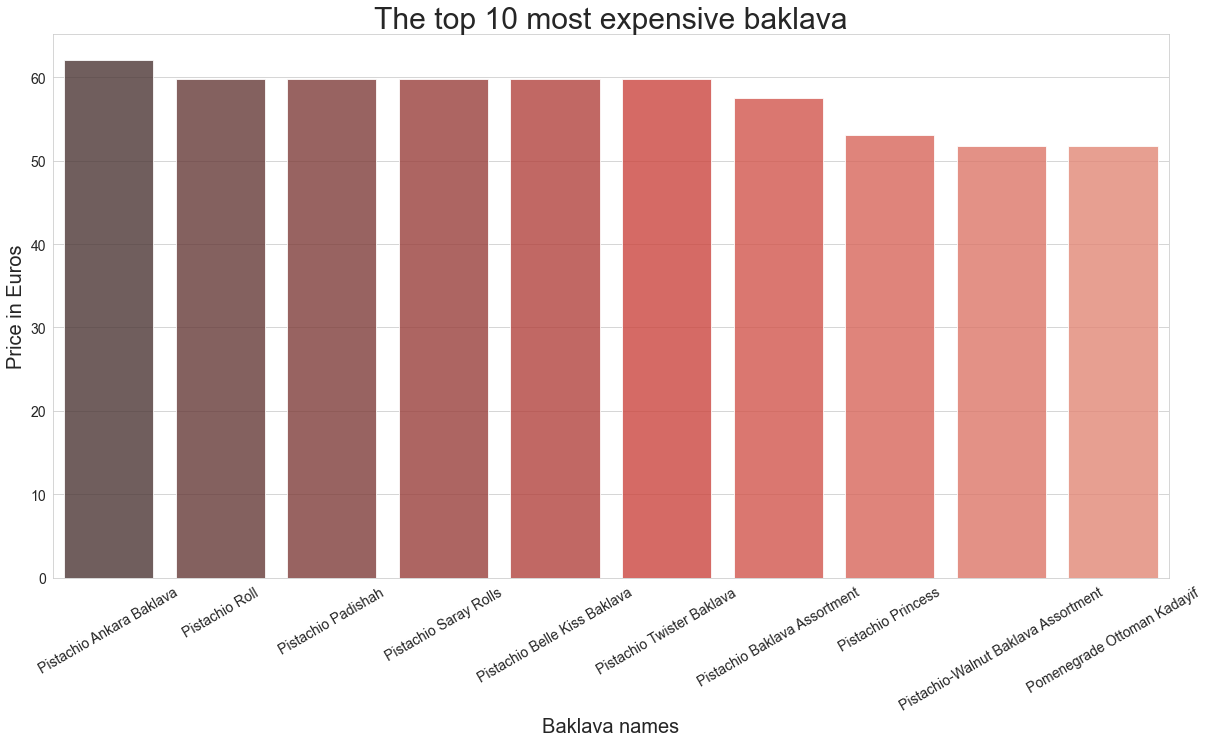

In [69]:

top_10_expensive_index = df_clean['baklava_price_euro'].sort_values(ascending=False)[0:11].index
top_10_expensive_price = df_clean.loc[top_10_expensive_index]['baklava_price_euro']
top_10_expensive_name = df_clean.loc[top_10_expensive_index]['baklava_name']

plt.figure(figsize=(20,10))
pal = sns.color_palette("Reds_d", len(top_10_expensive_index))
sns.barplot(top_10_expensive_name, top_10_expensive_price, alpha=0.8, palette=np.array(pal[::-1]))
plt.title('The top 10 most expensive baklava', fontsize=30)
plt.ylabel('Price in Euros', fontsize=20)
plt.xlabel('Baklava names', fontsize=20)
plt.tick_params(axis = 'x', rotation = 30)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

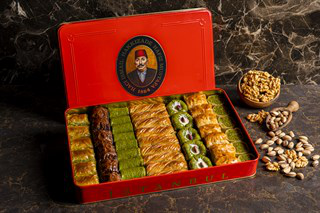

In [70]:
# Plot the most expensive baklava from hafizoglu
from PIL import Image
most_expensive_baklava_image = df_clean[df_clean['baklava_name'] == top_10_expensive_name[0]]['baklava_image_path'][0]
Image.open(most_expensive_baklava_image)

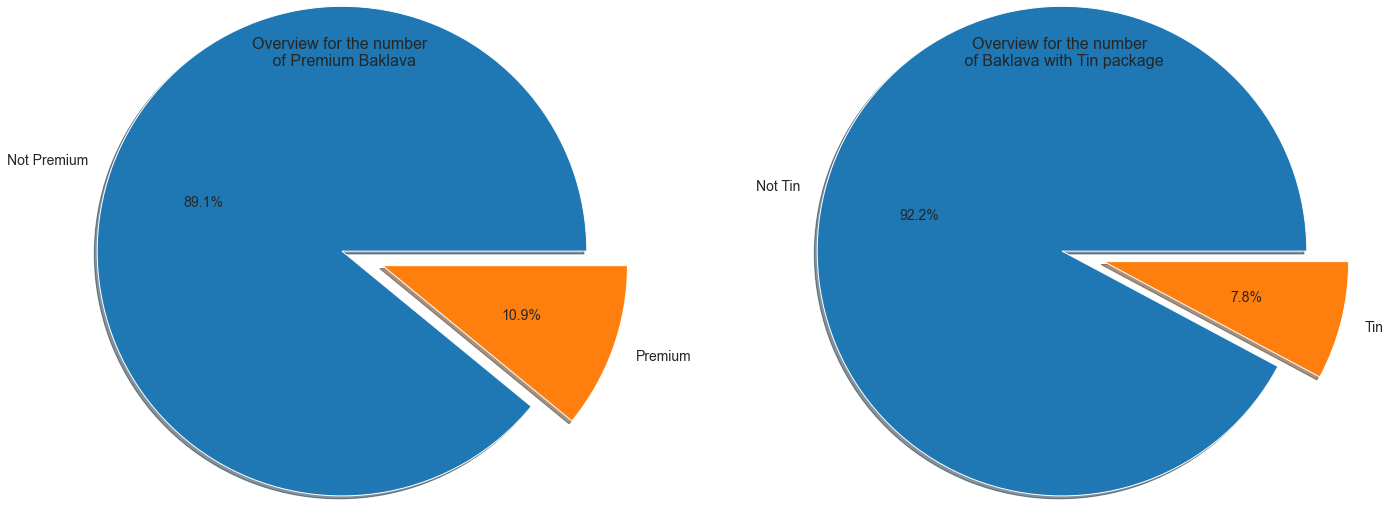

In [71]:
premium_pie = df_clean['premium'].value_counts()
tin_pie = df_clean['tin'].value_counts()

#create pie chart
fig = plt.figure(figsize=(20,10))
#plt.figure(figsize=(12,8))
#axis[0, 0].pie(premium_pie.values, labels = premium_pie.index, colors = colors, autopct='%.0f%%')
explode = (0,0.3)
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(premium_pie.values, labels=premium_pie.index, explode=explode, autopct='%1.1f%%', radius = 1.7, shadow=True,textprops={'fontsize': 14})

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(tin_pie.values, labels=tin_pie.index,explode=explode, autopct='%1.1f%%', radius = 1.7, shadow=True,textprops={'fontsize': 14})



ax1.set_title('Overview for the number \n of Premium Baklava',fontsize=16)
ax2.set_title('Overview for the number \n of Baklava with Tin package',fontsize=16)

plt.show()



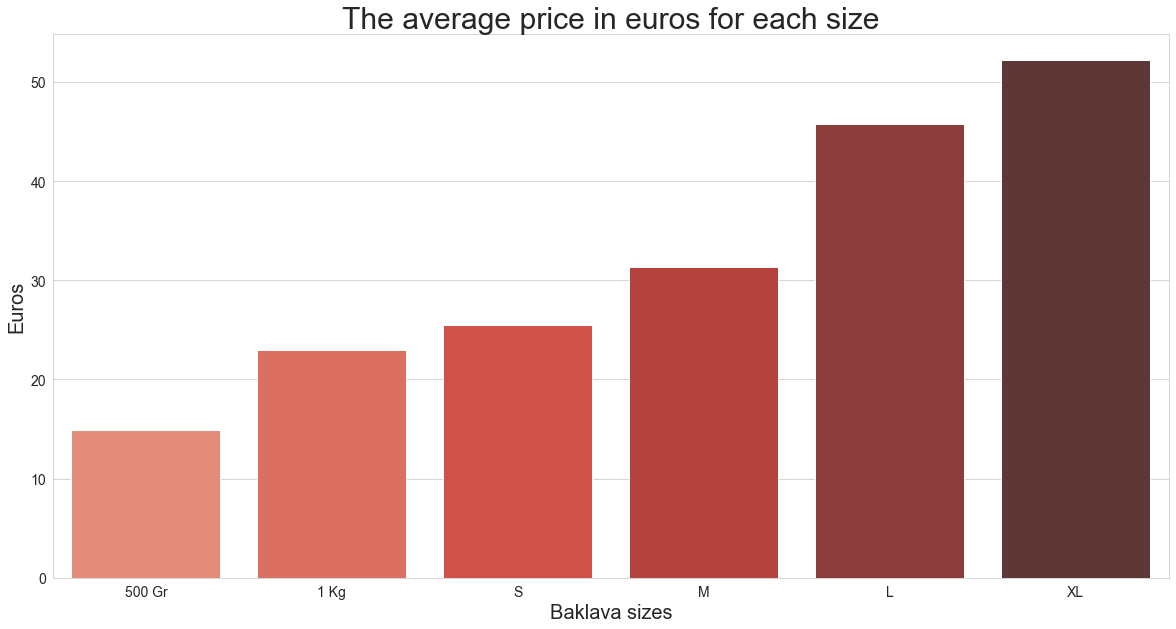

In [72]:
# perform groupby
size = df_clean.groupby(['baklava_size']).agg(mean_price_by_size=("baklava_price_euro", 'mean'))
size = size.reset_index()
size = size.set_index([pd.Index([1,0,4,3,2,5])]).sort_index() # to have chronology regards to the size

# Figure size
fig = plt.figure(figsize=(20,10))

pal = sns.color_palette("Reds_d", len(size))

# plot barplot
sns.barplot(x="baklava_size",
           y="mean_price_by_size",
           data=size,
           palette=np.array(pal))

plt.title('The average price in euros for each size', fontsize=30)
plt.ylabel('Euros', fontsize=20)
plt.xlabel('Baklava sizes', fontsize=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

#pal = sns.color_palette("Blues_d", len(top_10_expensive_index))
#sns.barplot(top_10_expensive_name, top_10_expensive_price, alpha=0.8, palette=np.array(pal[::-1]))

### Interactive visualizations

In [73]:
# Import plotly to create the interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [74]:
#Prepare the dataset to plot
size_names = df_clean['baklava_size'].value_counts().index
size_counts = df_clean['baklava_size'].value_counts().values

fig = px.pie(size_names, values=size_counts, names=size_names, title='Baklava size overview',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [89]:
#Prepare dataset to plot
label_tin = df_clean['tin'].value_counts().index
label_premium = df_clean['premium'].value_counts().index

value_tin = df_clean['tin'].value_counts().values
value_premium = df_clean['premium'].value_counts().values

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])


fig.add_trace(go.Pie(labels=label_tin, 
                     values=value_tin, 
                     name="Tin"),
              1, 1)

fig.add_trace(go.Pie(labels=label_premium, 
                     values=value_premium, 
                     name="Premium"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+value")



fig.update_layout(
    title_text="Overview of how many Premium baklavas and baklavas with Tin package",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Tin', x=0.205, y=0.5, font_size=20, showarrow=False),
                 dict(text='Premium', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [76]:
# Prepare data for plot
top_5_expensive_index = df_clean['baklava_price_euro'].sort_values(ascending=False)[0:6].index
bottom_5_expensive_index = df_clean['baklava_price_euro'].sort_values(ascending=False)[-5:].index
to_plot_indices = top_5_expensive_index.union(bottom_5_expensive_index)

to_plot_price = df_clean.loc[to_plot_indices]['baklava_price_euro'].sort_values(ascending=False)
to_plot_name = df_clean.loc[to_plot_price.index]['baklava_name']

# To add additionally information when holding the mouse above the bar chart
to_plot_premium = df_clean.loc[to_plot_price.index]['premium']
to_plot_tin = df_clean.loc[to_plot_price.index]['tin']

fig = px.bar(df_clean, 
             x=to_plot_name, 
             y=to_plot_price,
             hover_data=[to_plot_premium, to_plot_tin],
             labels={'hover_data_0':'Premium_or_not','hover_data_1':'Tin_or_not'},
             color=to_plot_price,
             color_continuous_scale=px.colors.sequential.Reds,
            title = "Top 5 and bottom 5 most expensive baklava") 
fig.show()

